In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from zipfile import ZipFile
import random

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

--2022-10-07 13:32:32--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.117.233.21, 2600:1409:9800:98c::317f, 2600:1409:9800:984::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.117.233.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   167MB/s    in 4.8s    

2022-10-07 13:32:37 (165 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [3]:
def OpenZip(path):
  with ZipFile(path, "r") as z:
    z.extractall("/tmp")
    print("Done!")

OpenZip("/tmp/cats-and-dogs.zip")

Done!


In [4]:
base_dir = "/tmp/PetImages"

base_dog_dir = os.path.join(base_dir, "Dog")
base_cat_dir = os.path.join(base_dir, "Cat")

In [5]:
dog_fnames = [dog for dog in os.listdir(base_dog_dir) if dog.split(".")[-1] == "jpg"]
cat_fnames = [cat for cat in os.listdir(base_cat_dir) if cat.split(".")[-1] == "jpg"]

In [6]:
for dog in os.listdir(base_dog_dir):
  if dog.split(".")[-1] != "jpg":
    os.remove(os.path.join(base_dog_dir, dog))

for cat in os.listdir(base_cat_dir):
  if cat.split(".")[-1] != "jpg":
    os.remove(os.path.join(base_cat_dir, cat))

In [7]:
print(f"Found {len(os.listdir(base_dog_dir)) - len(dog_fnames)} non-jpg file in dogs.")
print(f"Found {len(os.listdir(base_cat_dir)) - len(cat_fnames)} non-jpg file in cats.")

Found 0 non-jpg file in dogs.
Found 0 non-jpg file in cats.


In [8]:
print(f"There are {len(dog_fnames)} images of dogs.")
print(f"There are {len(cat_fnames)} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


In [9]:
root_dir = "/tmp/cats-v-dogs"

# if there is already a root dir, empty it
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  train_dir = os.path.join(root_dir, "training")
  val_dir = os.path.join(root_dir, "validation")

  os.makedirs(train_dir)
  os.makedirs(val_dir)

  os.makedirs(os.path.join(train_dir, "cats"))
  os.makedirs(os.path.join(train_dir, "dogs"))

  os.makedirs(os.path.join(val_dir, "cats"))
  os.makedirs(os.path.join(val_dir, "dogs"))

  print("Subdirectories are created!\n")

create_train_val_dirs(root_dir)

for rootdir, dirs, files in os.walk(root_dir):
  for subdir in dirs:
    print("Found -> ", os.path.join(rootdir, subdir))

Subdirectories are created!

Found ->  /tmp/cats-v-dogs/training
Found ->  /tmp/cats-v-dogs/validation
Found ->  /tmp/cats-v-dogs/training/dogs
Found ->  /tmp/cats-v-dogs/training/cats
Found ->  /tmp/cats-v-dogs/validation/dogs
Found ->  /tmp/cats-v-dogs/validation/cats


In [10]:
CAT_BASE_DIR = "/tmp/PetImages/Cat"
TRAINING_CATS = "/tmp/cats-v-dogs/training/cats"
VAL_CATS = "/tmp/cats-v-dogs/validation/cats"

DOG_BASE_DIR = "/tmp/PetImages/Dog"
TRAINING_DOGS = "/tmp/cats-v-dogs/training/dogs"
VAL_DOGS = "/tmp/cats-v-dogs/validation/dogs"

In [11]:
def split_data(base_dir, to_train_dir, to_val_dir, split_size):
  all_files = []

  for f in os.listdir(base_dir):
    fpath = os.path.join(base_dir, f)
    if os.path.getsize(fpath):
      all_files.append(f)
    else:
      print("{} is zero length, so ignoring.".format(f))
      
  n = len(all_files)
  split_point = int(n * split_size)
  shuffled = random.sample(all_files, n)

  train_set = shuffled[:split_point]
  val_set = shuffled[split_point:]

  for f in train_set:
    p = os.path.join(base_dir, f)
    shutil.copyfile(p, os.path.join(to_train_dir, f))

  for f in val_set:
    p = os.path.join(base_dir, f)
    shutil.copyfile(p, os.path.join(to_val_dir, f))

In [12]:
# empty directories if you run multiple times
if len(os.listdir(TRAINING_CATS)) > 0:
  for file in os.scandir(TRAINING_CATS):
    os.remove(file.path)
if len(os.listdir(VAL_CATS)) > 0:
  for file in os.scandir(VAL_CATS):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS)) > 0:
  for file in os.scandir(TRAINING_DOGS):
    os.remove(file.path)
if len(os.listdir(VAL_DOGS)) > 0:
  for file in os.scandir(VAL_DOGS):
    os.remove(file.path)

In [13]:
split_data(CAT_BASE_DIR, TRAINING_CATS, VAL_CATS, 0.9)
split_data(DOG_BASE_DIR, TRAINING_DOGS, VAL_DOGS, 0.9)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [14]:
print(f"Original cat's directory has {len(os.listdir(CAT_BASE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_BASE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS))} images of dogs for training")
print(f"There are {len(os.listdir(VAL_CATS))} images of cats for validation")
print(f"There are {len(os.listdir(VAL_DOGS))} images of dogs for validation")

Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [15]:
def train_val_generators(train_dir, val_dir):
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  train_gen = ImageDataGenerator(rescale=1/255.)
  val_gen = ImageDataGenerator(rescale=1/255.)

  train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  target_size=(150, 150))
  val_generator = val_gen.flow_from_directory(directory=val_dir,
                                              batch_size=32,
                                              class_mode="binary",
                                              target_size=(150, 150))
  return train_generator, val_generator

In [16]:
train_dir = "/tmp/cats-v-dogs/training"
val_dir = "/tmp/cats-v-dogs/validation"

train_generator, val_generator = train_val_generators(train_dir, val_dir)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [17]:
def create_model():
  model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation="relu"),
                               tf.keras.layers.MaxPooling2D(2,2),
                               tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150), activation="relu"),
                               tf.keras.layers.MaxPooling2D(2,2),
                               tf.keras.layers.Dropout(0.2),
                               
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(128, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
                               ])
  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

  return model

In [18]:
model = create_model()

hist = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

Epoch 1/10
415/704 [================>.............] - ETA: 40s - loss: 0.6364 - accuracy: 0.6416

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

704/704 [==============================] - 109s 137ms/step - loss: 0.6010 - accuracy: 0.6763 - val_loss: 0.5151 - val_accuracy: 0.7572
Epoch 2/10
704/704 [==============================] - 77s 109ms/step - loss: 0.4707 - accuracy: 0.7728 - val_loss: 0.4776 - val_accuracy: 0.7800
Epoch 3/10
704/704 [==============================] - 77s 110ms/step - loss: 0.3886 - accuracy: 0.8244 - val_loss: 0.4701 - val_accuracy: 0.7864
Epoch 4/10
704/704 [==============================] - 75s 107ms/step - loss: 0.2962 - accuracy: 0.8723 - val_loss: 0.5055 - val_accuracy: 0.7860
Epoch 5/10
704/704 [==============================] - 75s 107ms/step - loss: 0.1948 - accuracy: 0.9211 - val_loss: 0.5900 - val_accuracy: 0.7916
Epoch 6/10
704/704 [==============================] - 74s 106ms/step - loss: 0.1134 - accuracy: 0.9568 - val_loss: 0.6479 - val_accuracy: 0.7856
Epoch 7/10
704/704 [==============================] - 79s 113ms/step - loss: 0.0615 - accuracy: 0.9793 - val_loss: 0.7804 - val_accuracy: 0.

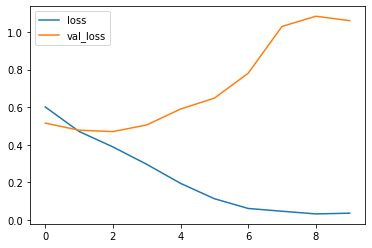

In [22]:
eps = range(len(hist.history["loss"]))

plt.plot(eps, hist.history["loss"])
plt.plot(eps, hist.history["val_loss"])
plt.legend(["loss", "val_loss"])

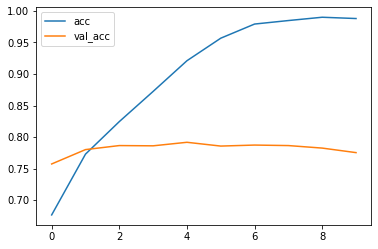

In [23]:
plt.plot(eps, hist.history["accuracy"])
plt.plot(eps, hist.history["val_accuracy"])
plt.legend(["acc","val_acc"])

## Data Augmentation

In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, model, logs={}):
    if logs.get("accuracy") > 0.9:
      print("Accuracy is larger than 90%, so stopping.")
      self.model.stop_training=True

In [25]:
def train_val_generators(train_dir, val_dir):
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  train_gen = ImageDataGenerator(rescale=1/255.,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode="nearest")
  val_gen = ImageDataGenerator(rescale=1/255.)

  train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  target_size=(150, 150))
  val_generator = val_gen.flow_from_directory(directory=val_dir,
                                              batch_size=32,
                                              class_mode="binary",
                                              target_size=(150, 150))
  return train_generator, val_generator


train_generator, val_generator = train_val_generators(train_dir, val_dir)
model2 = create_model()

hist = model2.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Epoch 1/10
658/704 [===========================>..] - ETA: 10s - loss: 0.6744 - accuracy: 0.5975

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

704/704 [==============================] - 168s 237ms/step - loss: 0.6719 - accuracy: 0.6002 - val_loss: 0.6265 - val_accuracy: 0.6460
Epoch 2/10
704/704 [==============================] - 166s 235ms/step - loss: 0.6109 - accuracy: 0.6642 - val_loss: 0.5736 - val_accuracy: 0.6944
Epoch 3/10
704/704 [==============================] - 165s 235ms/step - loss: 0.5760 - accuracy: 0.6973 - val_loss: 0.5296 - val_accuracy: 0.7224
Epoch 4/10
704/704 [==============================] - 165s 234ms/step - loss: 0.5560 - accuracy: 0.7147 - val_loss: 0.5138 - val_accuracy: 0.7504
Epoch 5/10
704/704 [==============================] - 164s 233ms/step - loss: 0.5404 - accuracy: 0.7288 - val_loss: 0.4810 - val_accuracy: 0.7700
Epoch 6/10
704/704 [==============================] - 163s 232ms/step - loss: 0.5297 - accuracy: 0.7318 - val_loss: 0.4920 - val_accuracy: 0.7672
Epoch 7/10
704/704 [==============================] - 164s 233ms/step - loss: 0.5175 - accuracy: 0.7413 - val_loss: 0.4841 - val_accura

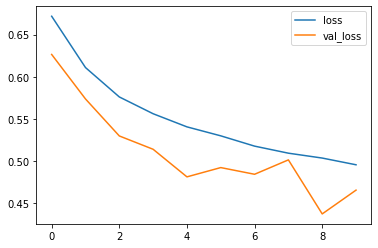

In [28]:
eps = range(len(hist.history["loss"]))

plt.plot(eps, hist.history["loss"])
plt.plot(eps, hist.history["val_loss"])
plt.legend(["loss", "val_loss"])

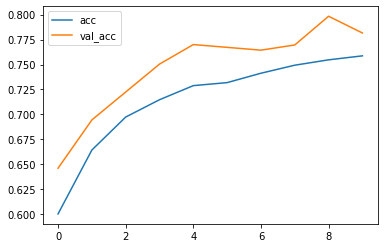

In [29]:
plt.plot(eps, hist.history["accuracy"])
plt.plot(eps, hist.history["val_accuracy"])
plt.legend(["acc","val_acc"])